<a href="https://colab.research.google.com/github/aenoela/algorithms/blob/main/algorithms_differentiation_integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Численное дифференцирование

Вычисление производной численными методами имеет смысл либо, если аналитическое вычисление производной невозможно либо, если аналитическое выражение неизвестно, и функция задана набором точек.

## Метод одностронней разности

### Теория

Производная функции f(x) определяется выражением:



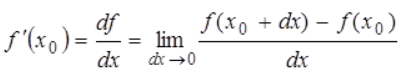

Заменяя приращение dx на конечную величину Δx, называемую шагом дифференцирования, получаем выражение:

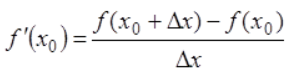

Если дифференцируемая функция задана в виде непрерывной функции, то для вычисления значения дифференциала необходимо получить значение функции f(x) в точке x$_0$ и в точке x$_0$+Δx. После чего можно вычислить значение производной функции f'(x).

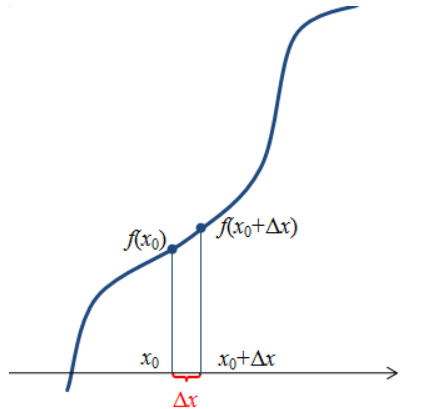

In [ ]:
import math
from scipy.misc import derivative
def f(x):
  #return x*math.exp(-x**2)
  return math.sin(x)*math.exp(-x**2)
# Параметры
x0 = 1
dx = 1e-6
reference = derivative(f, x0, dx=dx)
dif = my_derivative(f, x0, dx)
print('Производная через Scipy: ', reference)
print('='*40)
print('Метод одностронней разности: ', dif)
print('Delta: ',dif-reference)
print('='*40)

### Реализация метода

In [ ]:
def my_derivative(f, x, dx):
  '''
    Вычисленние производной в точке x методом одностронней разности
    Параметры:
      f - фукнция
      x - точка, в которой нужно вычислить производную
      dx - шаг дифференцирования
  '''
  return (f(x + dx) - f(x)) / dx

## Метод двустронней разности

### Теория

С точки зрения точности методы левосторонней и правосторонней разностей равнозначны. Более точное значение дает метод двусторонней разности (что особенно справедливо для гладких функций).

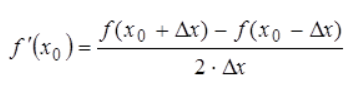

Наглядно сравнить одностороннюю и двустороннюю разности можно представив производную, как тангенс угла наклона касательной к функции в точке x$_i$. На рисунке ниже точное значение производной обозначено как tg($a_1$). В методе односторонней разности вместо касательной проводится прямая через точки x$_i$ и x$_{i+1}$. Если в окрестностях точки x$_i$ функция не гладкая, то значение производной tg($a_2$) будет существенно отличаться от точного. В то время как в методе двусторонней разности, проведя прямую через точки  x$_{i-1}$ и x$_{i+1}$, можно получить значение производной практически совпадающее с точным.

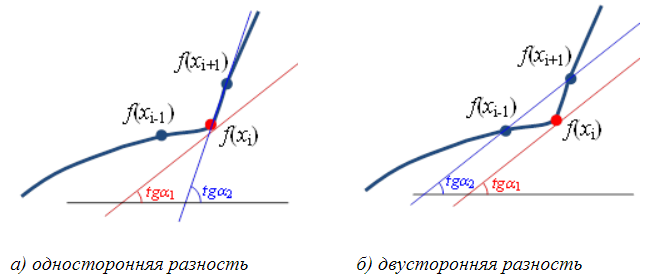

### Реализация метода

In [ ]:
def my_derivative_2s(f, x, dx):
  '''
    Вычисленние производной в точке x методом одностронней разности
    Параметры:
      f - фукнция
      x - точка, в которой нужно вычислить производную
      dx - шаг дифференцирования
  '''
  return (f(x + dx) - f(x - dx)) / (2*dx)

### Тестирование

In [ ]:
import math
from scipy.misc import derivative

def f(x):
  #return x*math.exp(-x**2)
  return math.sin(x)*math.exp(-x**2)

# Параметры
x0 = 1
dx = 1e-6

reference = derivative(f, x0, dx=1e-6)

dif = my_derivative(f, x0, dx)
dif2 = my_derivative_2s(f, x0, dx)

print('Производная через Scipy: ', reference)
print('='*40)
print('Метод одностронней разности: ', dif)
print('Delta: ',dif-reference)
print('='*40)
print('Метод двусторонней разности: ', dif2)
print('Delta: ',dif2-reference)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



x = np.arange(0, math.pi*1.5, 0.05)
y = [f(i) for i in x]
y2 = [my_derivative_2s(f, i, 1e-6) for i in x]

plt.figure(figsize=(10,10))
plt.grid()

plt.plot(x,y, label='fx')
plt.plot(x,y2, label='dx')
plt.legend()

# Вычисления площадей криволинейных фигур

## Метод прямоульников

### Теория

Для некоторых фигур, например кругов, известны простые формулы расчета
площади. Есть формулы и для объемов некоторых тел, например, цилиндра, шара.
Но количество плоских фигур и тел неизмеримо велико, и для большинства из

них никаких формул геометрия не дает. Некоторую помощь в этом вопросе оказы-
вает математический анализ, связывающий проблему счета площадей и объемов

с операцией интегрирования. Оказывается, понятие интеграла имеет несколько
интерпретаций, геометрическая интерпретация связана с расчетом площадей и
объемов.

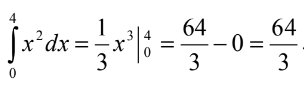

К сожалению, сведение расчета площади к интегралу не всегда решает проблему. Если форма кривой известна (а построить функцию на наборе точек можно

всегда, это мы видели из метода наименьших квадратов), то записать интегральное выражение можно, но, скорее всего, этот интеграл окажется «неберущимся», то есть не имеющим простого аналитического выражения.
В этом случае необходимо обратиться к вычислительным методам. Попробуем
ответить на вопрос, что означает применение вычислительных методов к задаче счета площади. Что вообще означает посчитать площадь?
Если сказано, что площадь некоторой фигуры составляет 10 кв. м это означает,что в фигуру можно уложить 10 квадратов, каждый площадью по одному квадратному метру. В общем можно сказать, что измерить площадь фигуры – это то же самое, что уложить в фигуру фигуры, чьи площади измеряются легко, по известным геометрическим формулам.

Сумму площадей этих прямоугольников можно с некоторой погрешностью
считать площадью криволинейной фигуры. Погрешность будет тем меньше, чем
прямоугольников больше, или, иначе говоря, чем мельче разбиение отрезка [a, b].

### Реализация метода прямоульников

In [ ]:
#метод прямоугольников
def rect_integral(f,xmin,xmax,n):
    dx=(xmax-xmin)/n
    area=0
    x=xmin
    for i in range(n):
        area+=dx*f(x)
        x+=dx
    return area

## Оптимизация метода прямоугольников

Важное замечание о погрешности. В действительности указанный метод оценки безусловно работает только в случае функций, монотонно убывающих или монотонно возрастающих на отрезке [a, b]. Кроме того, для погрешности метода
совершенно не безразлично, как строятся прямоугольники. Наибольшая точность
будет достигнута, если опорную точку для построения высоты брать в середине отрезка разбиения. В этом случае формула расчета интеграла выглядит следующим образом:

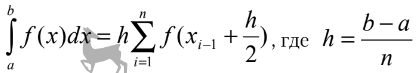

### Реализация оптимизированного метода прямоугольников

In [ ]:
def rect_integral2(f,xmin,xmax,n):
    dx=(xmax-xmin)/n
    area=0
    x=xmin
    for i in range(n):
        area+=dx*f(x+dx/2)
        x+=dx
    return area

## Метод трапеций

### Теория

Идея ускорения вычислительного процесса лежит на поверхности. Если замощение прямоугольниками не дает желательной эффективности, то нужно выбрать фигуру, расчет площади которой не сложнее, чем расчет площади прямоугольника, но эта фигура ложилась бы на кривую более точно. Такой простой фигурой будет трапеция. Действительно, формула для вычисления площади трапеции не
принципиально отличается от счета площади прямоугольника:

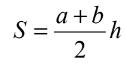

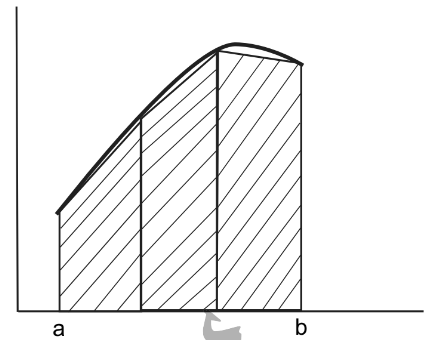

### Реализация метода трапеций

In [ ]:
#метод трапеций
def tr_integral(f,xmin,xmax,n):
    dx=(xmax-xmin)/n
    area=0
    x=xmin
    for i in range(n):
        area+=dx*(f(x)+f(x+dx))/2
        x+=dx
    return area

### Тесты

In [ ]:
def expint(fun, a, b):
    return quad(fun, a, b)[0]

In [ ]:
import math
from scipy.integrate import quad
import numpy as np


def fn(x):
    return 3*x**2 #math.sin(x)+math.cos(x)

a, b = 0, 2

print("Reference: {}".format(expint(fn,a,b)))
print("Rect_integral: {}".format(rect_integral(fn,a,b,1000)))
print("Rect_integral2: {}".format(rect_integral2(fn,a,b,1000)))
print("tr_integral: {}".format(tr_integral(fn,a,b,1000)))

Reference: 8.0
Rect_integral: 7.9880040000000125
Rect_integral2: 7.999998000000022
tr_integral: 8.000004000000006


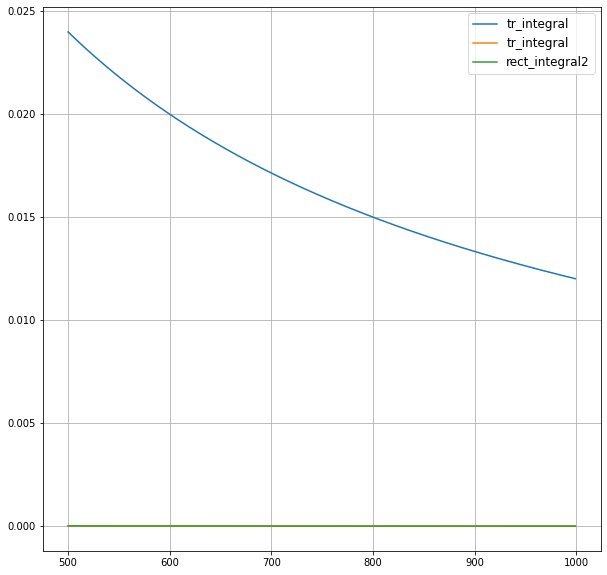

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


def cal_delta(reference, function, n):
  return abs(function(fn, 0, 2, n) - reference)


x = np.arange(500,1000)
ref = expint(fn,0,2)
y = np.array([cal_delta(ref, rect_integral, i) for i in x])
y2 = np.array([cal_delta(ref, tr_integral, i) for i in x])
y3 = np.array([cal_delta(ref, rect_integral2, i) for i in x])

plt.figure(figsize=(10,10))
plt.grid()

plt.plot(x,y, label='tr_integral')
plt.plot(x,y2, label='tr_integral')
plt.plot(x,y3, label='rect_integral2')

plt.legend(fontsize = 12)
